![title](autoencoder_1.png)



In [36]:
import torch
import torchvision.transforms as transforms
import numpy as np
from torchvision import datasets

transform = transforms.ToTensor()
    

train_data = datasets.MNIST(root = 'data', train = True, download=True, transform = transform)
test_data = datasets.MNIST(root = 'data', train = False, download =True, transform = transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=20)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20)


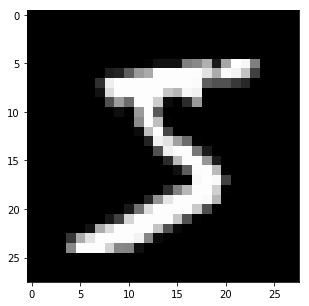

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

images, labels = next(iter(train_loader))

images = images.numpy()

img = np.squeeze(images[0])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap = 'gray')

In [38]:
import torch.nn as nn
import torch.nn.functional as F

class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvAutoEncoder, self).__init__()
        #Encoder layers
        self.fc1 = nn.Conv2d(1, 16, 3, padding=1)
        self.fc2 = nn.Conv2d(16, 4, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        
        #Decoder
        self.decoder = nn.ConvTranspose2d(4, 16, 2, stride= 2)
        self.decoder2 = nn.ConvTranspose2d(16, 1, 2, stride=2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.pool(x)
        x = F.relu(self.fc2(x))
                   
        x = self.pool(x)
        
        x = F.relu(self.decoder(x))
        
        x = F.sigmoid(self.decoder2(x))
        
        return x
        
        

In [39]:
model = ConvAutoEncoder()
print(model)

ConvAutoEncoder(
  (fc1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (decoder): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (decoder2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
)


In [40]:
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

training_on_gpu = torch.cuda.is_available()

training_on_gpu

True

In [41]:
epoch = 20

for epoch in range(1, epoch+1):
    train_loss = 0.0
    
    for data in train_loader:
        
        images, labels = data
        
        optimizer.zero_grad()
        
        output = model(images)
        
        loss = criterion(output, images)
        
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item() * images.size(0)
    
    train_loss = train_loss / len(train_loader)
    
    print('Epoch {} --> Loss {}'.format(epoch, train_loss))
        
    

C:\Anaconda\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1 --> Loss 1.7897074257830778
Epoch 2 --> Loss 0.5951501117522517
Epoch 3 --> Loss 0.39837978669752677
Epoch 4 --> Loss 0.3596556219396492
Epoch 5 --> Loss 0.33640930292507015
Epoch 6 --> Loss 0.31929104128852487
Epoch 7 --> Loss 0.3067863954852025
Epoch 8 --> Loss 0.29688100329910716
Epoch 9 --> Loss 0.28888885567585626
Epoch 10 --> Loss 0.28237074196959533
Epoch 11 --> Loss 0.2769416283816099
Epoch 12 --> Loss 0.272475888847063
Epoch 13 --> Loss 0.26885897378747664
Epoch 14 --> Loss 0.2658386905118823
Epoch 15 --> Loss 0.2631723463535309
Epoch 16 --> Loss 0.26078547433639565
Epoch 17 --> Loss 0.25855517712732157
Epoch 18 --> Loss 0.25648951093355815
Epoch 19 --> Loss 0.25445123188818497
Epoch 20 --> Loss 0.25241383040323856


C:\Anaconda\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


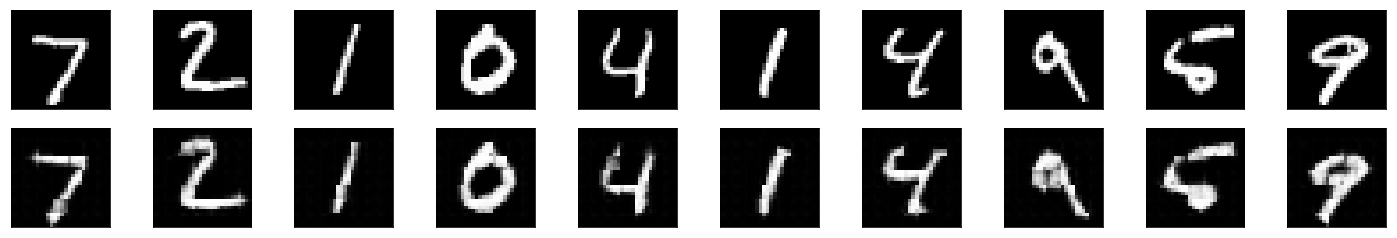

In [42]:
dataiter = iter(test_loader)

images, labels = dataiter.next()

output = model(images)


images= images.numpy()

output = output.view(20, 1, 28, 28)
output = output.detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex =True, sharey = True, figsize= (25,4))


for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap = 'gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Using Upsampling

In [43]:
import torch.nn as nn
import torch.nn.functional as F

class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvAutoEncoder, self).__init__()
        #Encoder layers
        self.fc1 = nn.Conv2d(1, 16, 3, padding=1)
        self.fc2 = nn.Conv2d(16, 4, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        
        #Decoder
        self.fc3 = nn.Conv2d(4, 16, 3, stride = 1)
        self.fc4 = nn.Conv2d(16, 1, 3, stride=1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.pool(x)
        x = F.relu(self.fc2(x))          
        x = self.pool(x)
        
        #Decoder
        x = F.upsample(x, scale_factor=2, mode='nearest')
        x = F.relu(self.fc3(x))
        
        x = F.upsample(x, scale_factor=2, mode = 'nearest')
        x = F.sigmoid(self.decoder2(x))
        
        return x
        
        

In [44]:
epoch = 12

for epoch in range(1, epoch+1):
    train_loss = 0.0
    
    for data in train_loader:
        
        images, labels = data
        
        optimizer.zero_grad()
        
        output = model(images)
        
        loss = criterion(output, images)
        
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item() * images.size(0)
    
    train_loss = train_loss / len(train_loader)
    
    print('Epoch {} --> Loss {}'.format(epoch, train_loss))
        
    

C:\Anaconda\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1 --> Loss 0.2505571499094367
Epoch 2 --> Loss 0.24888684710487724
Epoch 3 --> Loss 0.24732170216739177
Epoch 4 --> Loss 0.245835890226687
Epoch 5 --> Loss 0.24440441524609924
Epoch 6 --> Loss 0.24298077078225713
Epoch 7 --> Loss 0.24166908437075715
Epoch 8 --> Loss 0.24047239696296552
Epoch 9 --> Loss 0.2393695590334634
Epoch 10 --> Loss 0.23833628550792735
Epoch 11 --> Loss 0.2373696223894755
Epoch 12 --> Loss 0.23646012195075553


C:\Anaconda\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


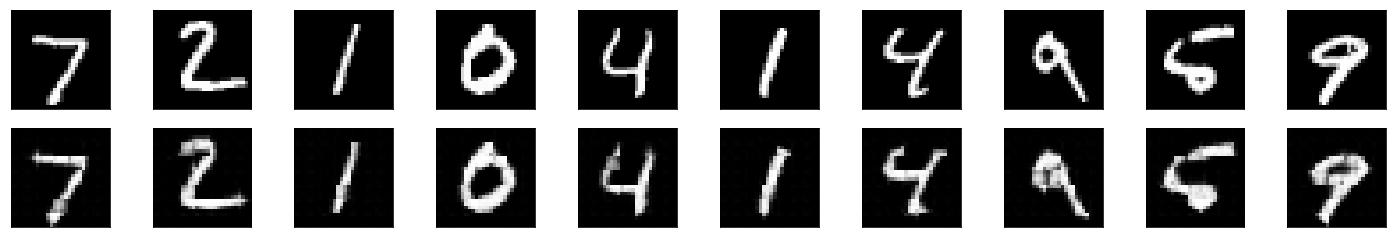

In [45]:
dataiter = iter(test_loader)

images, labels = dataiter.next()

output = model(images)


images= images.numpy()

output = output.view(20, 1, 28, 28)
output = output.detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex =True, sharey = True, figsize= (25,4))


for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap = 'gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)